<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[6차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ ROI (Region of Image)를 자르고 표시하는 방법에 대해 학습한다.<br>
○ 한글을 출력하는 방법에 대해 학습한다.<br>
○ 비트 연산 및 크로마 키(Chroma key) 합성으로 이미지를 합성하는 방법을 학습한다.

</font></td></tr>   
</table>

# 픽셀/블록 기반 이미지 처리

## ROI (Region of Image) 자르기

- ROI (Region of Image) 
   - 관심영역 - 이미지에 우리가 필요한 부분 (얼굴, 눈 ...)
   
<img src="./lecture_image/06_roi.png" width=30%>  


- <font color=red>img[200:370, 200:350]</font>

<img src="./lecture_image/06_roi2.png" width=60%>  


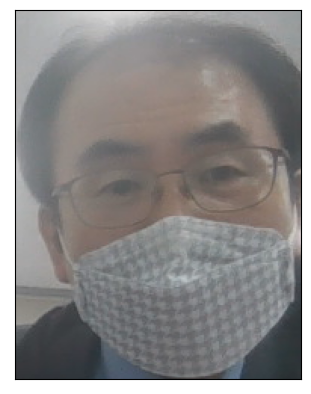

In [3]:
#실습

import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/img6.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
sliced_roi = img[70:315,450:640]

plt.xticks([]), plt.yticks([])
plt.imshow(sliced_roi)

In [4]:
print(img.shape)

(480, 640, 3)


## ROI에 도형 그리기

- <font color=red>cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께)</font> : 직선 그리기

<img src="./lecture_image/06_line.png" width=40%>  

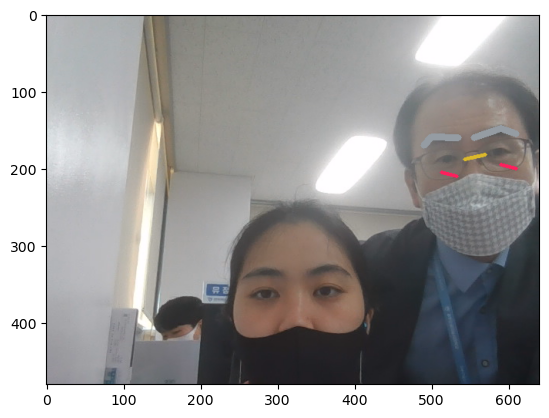

In [5]:
#실습
line_img = cv2.line(img, (490, 170), (500, 159), (149, 156, 163), 8)
line_img = cv2.line(img, (500, 159), (535, 160), (149, 156, 163), 8)
line_img = cv2.line(img, (555, 160), (590, 148), (149, 156, 163), 8)
line_img = cv2.line(img, (590, 148), (610, 155), (149, 156, 163), 8)

line_img = cv2.line(img, (513, 205), (533, 210), (255, 31, 93), 3)
line_img = cv2.line(img, (590, 195), (610, 200), (255, 31, 93), 3)

line_img = cv2.line(img, (543, 188), (570, 182), (219, 184, 43), 3)
plt.imshow(line_img)

- <font color=red>cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께)</font> : 원 그리기

<img src="./lecture_image/06_circle.png" width=20%>  

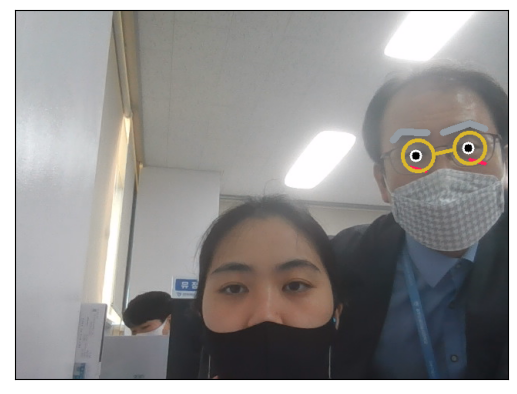

In [6]:
#실습

circle_img = cv2.circle(img, (523, 190), 20, (219, 184, 43), 3)
circle_img = cv2.circle(img, (590, 180), 20, (219, 184, 43), 3)

# 두께를 -1로 하면 채운 원이 출력
circle_img = cv2.circle(img, (520, 190), 8, (254, 254, 254), -1)
circle_img = cv2.circle(img, (588, 180), 8, (254, 254, 254), -1)
circle_img = cv2.circle(img, (520, 190), 5, (0, 0, 0), -1)
circle_img = cv2.circle(img, (588, 180), 5, (0, 0, 0), -1)

plt.xticks([]), plt.yticks([])
plt.imshow(circle_img)

- <font color=red>cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께)</font> : 사각형 그리기

<img src="./lecture_image/06_rectangle.png" width=30%>  

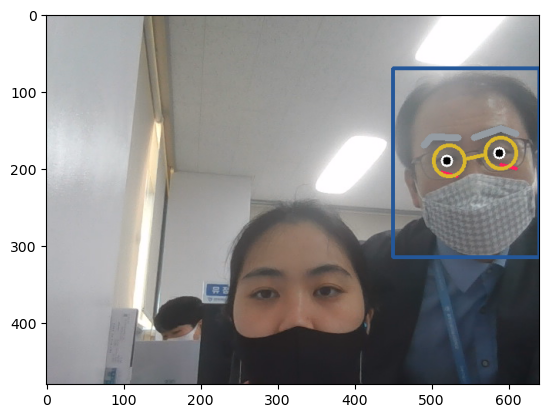

In [7]:
#실습
rectangle_img = cv2.rectangle(img, (450, 70), (640, 315), (36, 87,153), 4)

plt.imshow(rectangle_img)

- <font color=red>cv2.ellipse(배경이미지, 중심좌표, 장축/단축 반지름, 기울기, 호의시작각, 호의 종료각, 색상, 선두께)</font> : 타원 그리기

<img src="./lecture_image/06_ellipse.png" width=30%>  

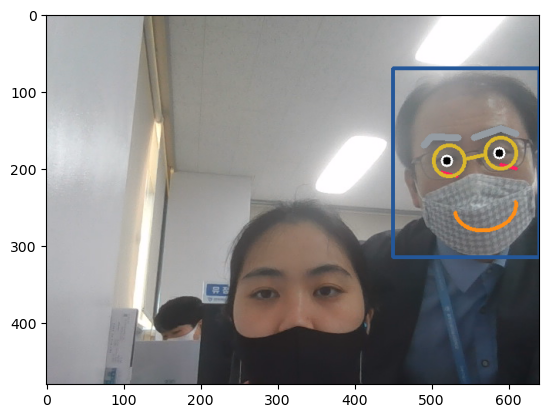

In [8]:
#실습

ellipse_img = cv2.ellipse(img, (570, 250), (40, 30), 350, 0, 180, (255, 142, 22), 3)

plt.imshow(ellipse_img)

- <font color=red>cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 굵기)</font> : 텍스트 그리기

<img src="./lecture_image/06_text.png" width=30%>  

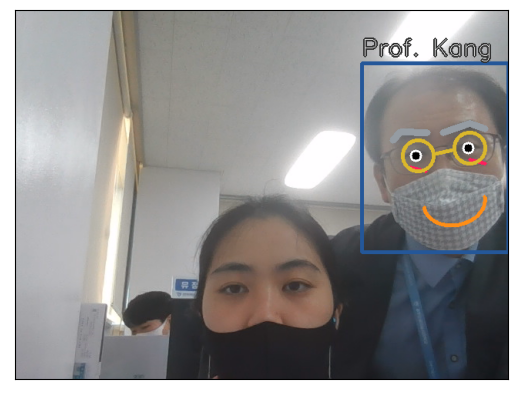

In [9]:
#실습

text_img = cv2.putText(img, "Prof. Kang", (450, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (48, 48, 48), 3)
text_img = cv2.putText(img, "Prof. Kang", (450, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (232, 232, 232), 1)

plt.xticks([]), plt.yticks([])
plt.imshow(text_img)

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 이미지에 ROI 영역을 표시하고 이름을 출력해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/06_ryan.png" width=20%></td></tr>   
</table>

## 한글 출력하기

- c:/Windows/Fonts 폴더에서 사용할 폰트를 현재 폴더에 fonts 폴더를 생성하고 복사한다


- <font color=red>font = ImageFont.truetype("fonts/gulim.ttc", 30)</font> : 사용할 폰트와 크기를 가져온다

- <font color=red>img_pil = Image.fromarray(img)</font> : array 이미지를 PIL 이미지로 변환

- <font color=red>draw = ImageDraw.Draw(img_pil)</font> : PIL 이미지를 그림

- <font color=red>draw.text((200, 20), "레나 이미지", font=font, fill=(0, 0, 255, 0))</font> : 이미지에 텍스트를 그림

- <font color=red>img = np.array(img_pil)</font> : PIL 이미지를 numpy 배열로 변환

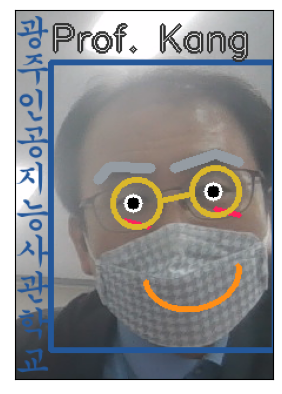

In [10]:
#실습

import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt


# 폰트 가져오기(폰트, 글씨 크기)
font = ImageFont.truetype("./image/H2GSRB.TTF", 30)

# 이미지 위에 폰트를 올리기 위해서 폰트를 이미지 형태로 변환
# - 원본 이미지(numpy array)를 이미지 타입으로 변경
img_pil = Image.fromarray(img)

# 변환된 이미지를 캔버스에 그려준다.
draw = ImageDraw.Draw(img_pil)

# 폰트를 그린 이미지에 그려준다.
# 시작좌표, 출력내용, 폰트, 색상, (R, G, B, A(투명도))
draw.text((420, 30), "광\n주\n인\n공\n지\n능\n사\n관\n학\n교", font=font, fill=(36, 87,153, 0))

# matplotlib으로 출력하기 위해서 numpy array로 변환
font_img = np.array(img_pil)

img = font_img[25:340, 420:]

plt.xticks([]), plt.yticks([])
plt.imshow(img)
plt.savefig("./image/prof.K.png")

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 다른 폰트의 한글을 출력해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/06_ryan2.png" width=20%></td></tr>   
</table>

# 이미지 합성하기

## 비트 연산을 이용해서 합성하기

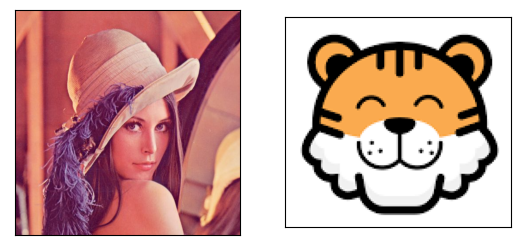

In [11]:
#실습

import cv2
import matplotlib.pyplot as plt

# 원본 이미지
img = cv2.imread("./image/lenna.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 원본 이미지에 합성할 이미지
img2 = cv2.imread("./image/tiger.png", cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

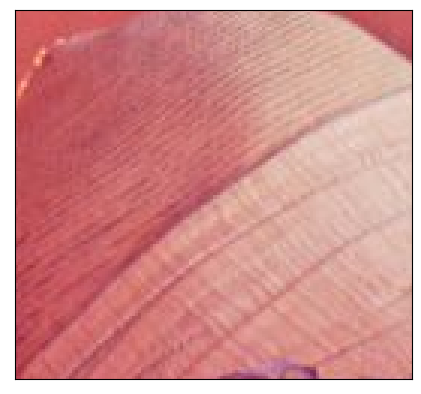

In [12]:
# 실습
# 이미지를 올릴 위치의 원본 이미지 부분을 잘라낸다.
rows, cols, channels = img2.shape
roi = img[50 : rows + 50, 150 : cols + 150]

plt.xticks([]), plt.yticks([])
plt.imshow(roi)

- <font color=red>cv2.bitwise_not(mask)</font>
  - mask는 흑백이미지여야 함
  - 0을 255로 255롤 0으로 변환 (반전)

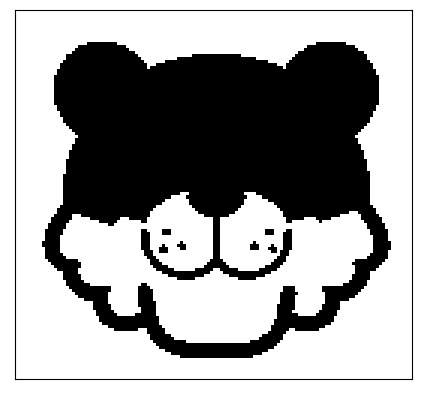

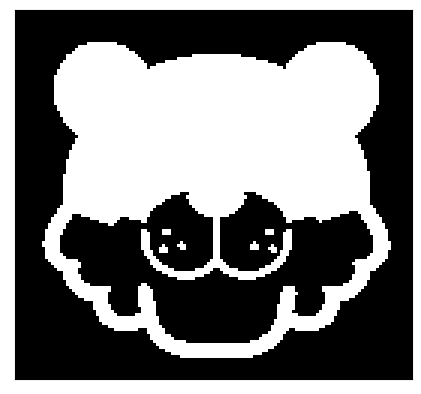

In [13]:
#실습

# gray 이미지
gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
_, th_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)

plt.xticks([]), plt.yticks([])
plt.imshow(th_img, cmap="gray")
plt.show()

# 반전 이미지
inv_img = cv2.bitwise_not(th_img)
plt.xticks([]), plt.yticks([])
plt.imshow(inv_img, cmap="gray")
plt.show()

- <font color=red>cv2.bitwise_and(src1, src2, mask)></font> : mask의 값이 아닌 부분만 src1과 src2를 AND 연산
  - mask는 흑백이미지여야 함
  - mask 값이 0인 부분 (검정)은 연산되지 않고 검정색 부분 그대로 놓여짐

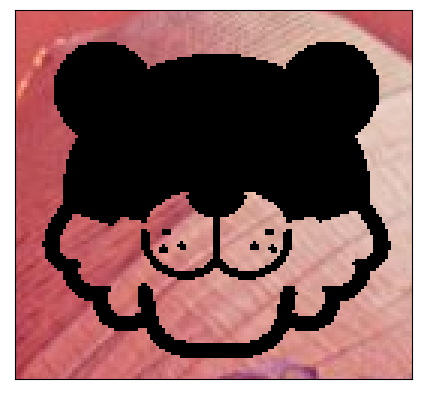

In [14]:
#실습
# 합성할 이미지가 들어갈 영역을 만듦
img_bg = cv2.bitwise_and(roi, roi, mask=th_img)

plt.xticks([]), plt.yticks([])
plt.imshow(img_bg)
plt.show()

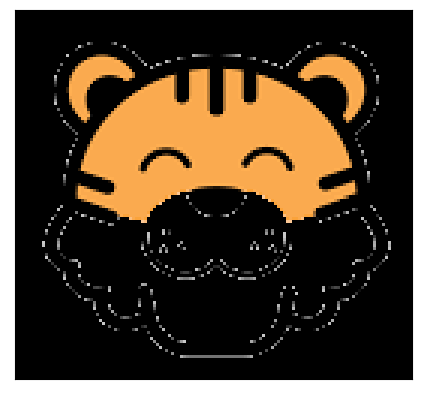

In [15]:
#실습
# 호랑이 이미지에서 원본 이미지에 올라갈 부분만 추출
img_fg = cv2.bitwise_and(img2, img2, mask=inv_img)

plt.xticks([]), plt.yticks([])
plt.imshow(img_fg)
plt.show()

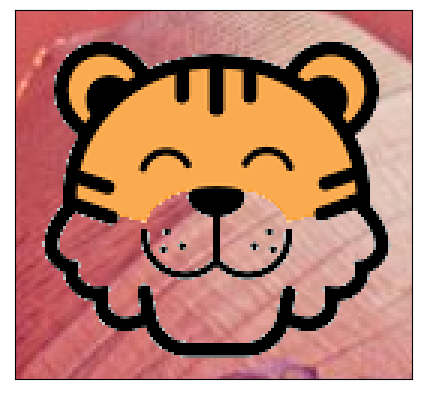

In [16]:
#실습
# bg_img에 fg_img을 합성
img_bg = cv2.add(img_bg, img_fg)

plt.xticks([]), plt.yticks([])
plt.imshow(img_bg)
plt.show()

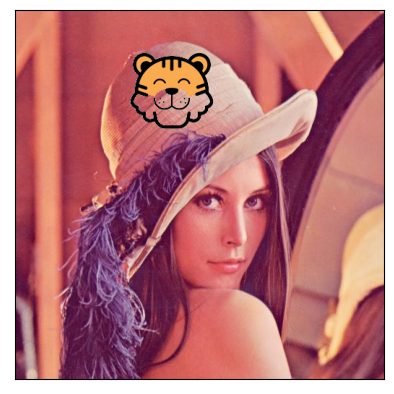

In [17]:
#  원본 이미지에 img_bg를 합성
img[50 : rows + 50, 150 : cols + 150] =img_bg

plt.xticks([]), plt.yticks([])
plt.imshow(img)
plt.show()

<table border=1>
    <tr><td colspan=3 style="border: 1px solid black; width:600px; text-align: left;">
        <font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=2>○ 다음과 같이 2개의 이미지를 합성해보자.</font></td></tr> 
    <tr>
        <td style="border: 1px solid black;">
        <img src="./lecture_image/ryan_cap2.png" width=80%></td>        
    </tr>       
</table>

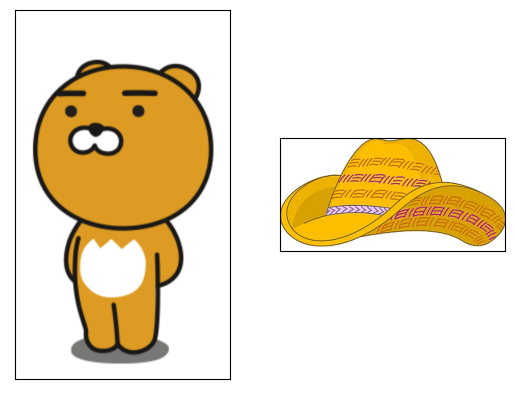

In [18]:
import cv2
import matplotlib.pyplot as plt

# 원본 이미지
img = cv2.imread("./image/ryan.PNG", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 원본 이미지에 합성할 이미지
img2 = cv2.imread("./image/cap.PNG", cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

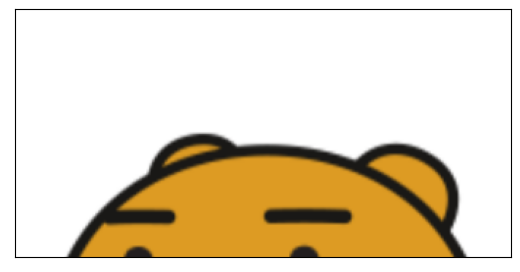

In [19]:
# 이미지 올릴 위치 자르기
rows, cols, channels = img2.shape
roi = img[0: rows, 10 : cols + 10]

plt.xticks([]), plt.yticks([])
plt.imshow(roi)

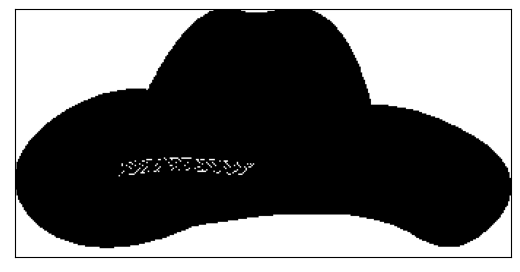

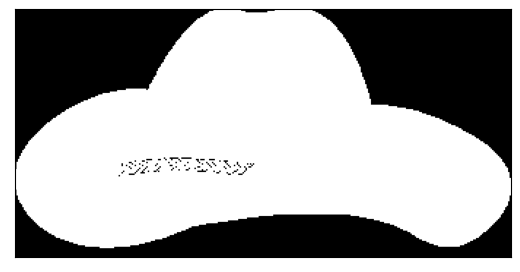

In [20]:
gray_img = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
_, th_img = cv2.threshold(gray_img, 230, 255, cv2.THRESH_BINARY)  
# 이미지 중간이 지워지는 부분이 있으면 threshold 값을 변경해 주면됨  : 220 >> 250 : 이미지는 무조건 새까매야함

plt.xticks([]), plt.yticks([])
plt.imshow(th_img, cmap="gray")
plt.show()

# 반전 이미지
inv_img = cv2.bitwise_not(th_img)
plt.xticks([]), plt.yticks([])
plt.imshow(inv_img, cmap="gray")
plt.show()

NameError: name 'result_close' is not defined

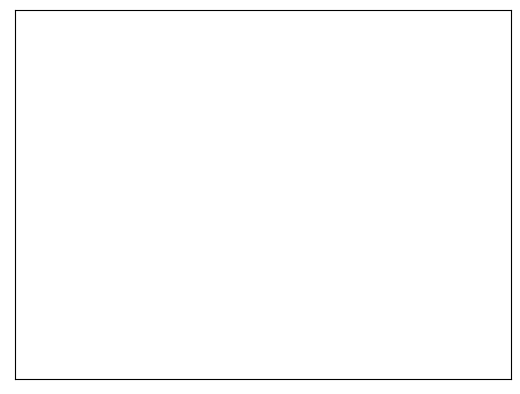

In [21]:
import numpy as np

kernel = np.ones((3, 3), np.uint8)

inv_img = cv2.morphologyEx(inv_img, cv2.MORPH_CLOSE, kernel)

plt.xticks([]), plt.yticks([])
plt.imshow(result_close, cmap="gray")

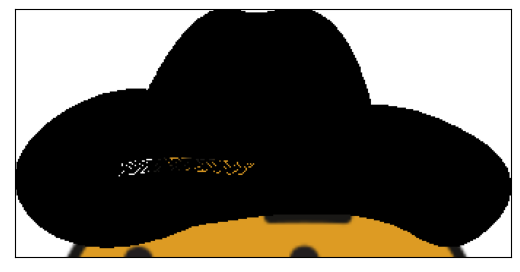

In [22]:
# 합성할 이미지가 들어갈 영역을 만듦
img_bg = cv2.bitwise_and(roi, roi, mask=th_img)

plt.xticks([]), plt.yticks([])
plt.imshow(img_bg)
plt.show()

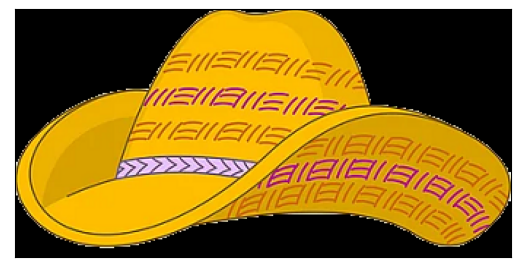

In [23]:
# 모자 이미지에서 원본 이미지에 올라갈 부분만 추출
img_fg = cv2.bitwise_and(img2, img2, mask=inv_img)

plt.xticks([]), plt.yticks([])
plt.imshow(img_fg)
plt.show()

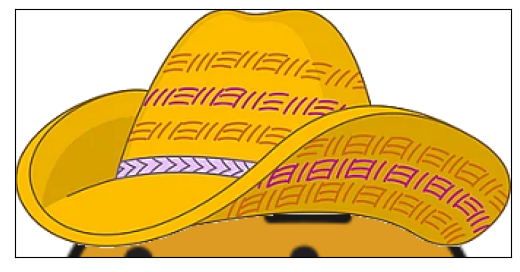

In [24]:
# bg_img에 fg_img를 합성
img_bg = cv2.add(img_bg, img_fg)

plt.xticks([]), plt.yticks([])
plt.imshow(img_bg)
plt.show()

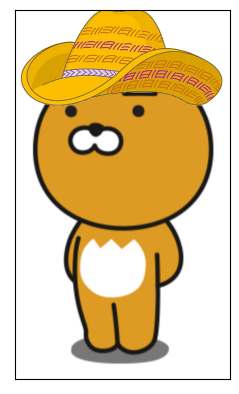

In [25]:
# 원본 이미지에 img_bg를 합성
img[0: rows, 10 : cols + 10] = img_bg

plt.xticks([]), plt.yticks([])
plt.imshow(img)
plt.show()

## 혼자서 해보기

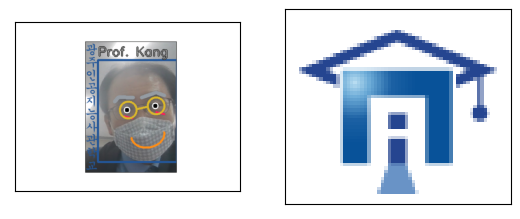

In [26]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/prof.K.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("./image/gjaiscool.png", cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

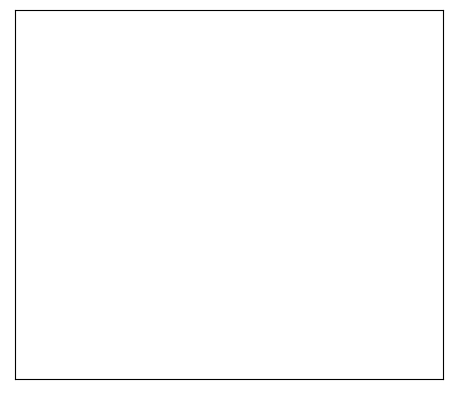

In [27]:
rows, cols, channels = img2.shape
roi = img[280: rows + 280, 35 : cols + 35]

plt.xticks([]), plt.yticks([])
plt.imshow(roi)

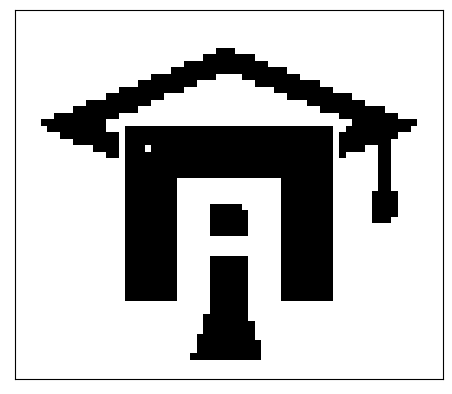

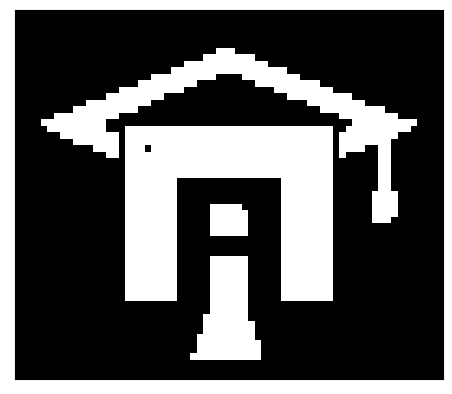

In [28]:
gray_img = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
_, th_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)

plt.xticks([]), plt.yticks([])
plt.imshow(th_img, cmap="gray")
plt.show()

inv_img = cv2.bitwise_not(th_img)
plt.xticks([]), plt.yticks([])
plt.imshow(inv_img, cmap="gray")
plt.show()

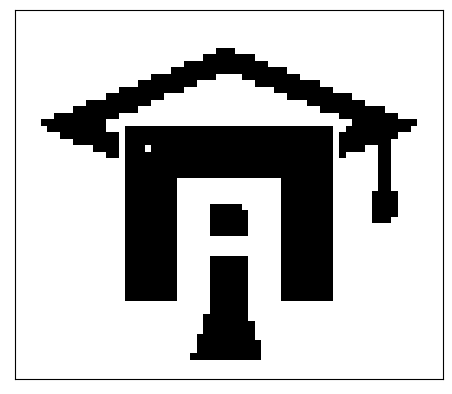

In [29]:
img_bg = cv2.bitwise_and(roi, roi, mask =th_img)

plt.xticks([]), plt.yticks([])
plt.imshow(img_bg)
plt.show()

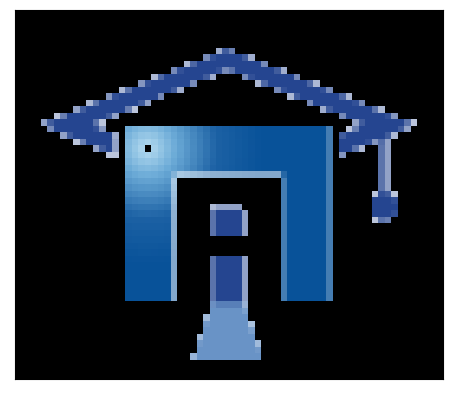

In [30]:
img_fg = cv2.bitwise_and(img2, img2, mask=inv_img)

plt.xticks([]), plt.yticks([])
plt.imshow(img_fg)
plt.show()

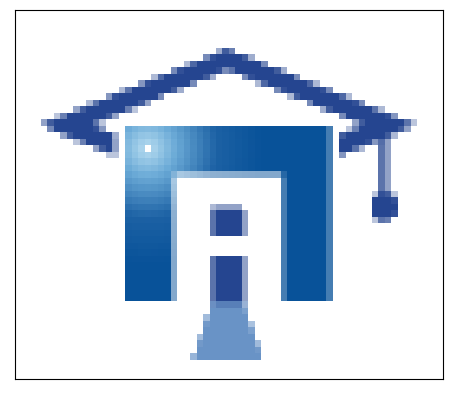

In [31]:
img_bg = cv2.add(img_bg, img_fg)

plt.xticks([]), plt.yticks([])
plt.imshow(img_bg)
plt.show()

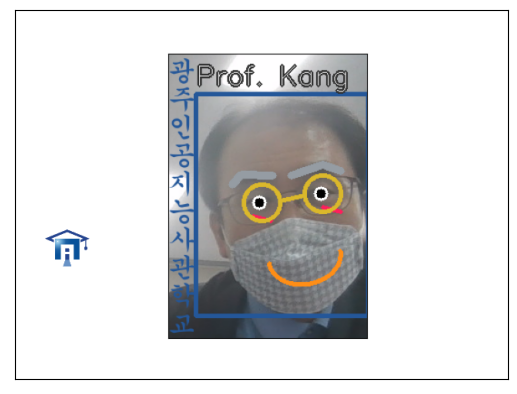

In [32]:
img[280: rows + 280, 35 : cols + 35] = img_bg

plt.xticks([]), plt.yticks([])
plt.imshow(img)
plt.show()

## 덕구 클라이밍 하기

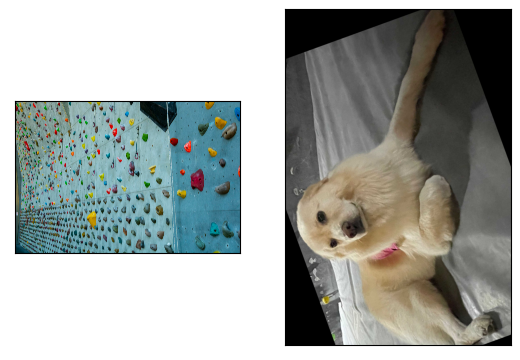

In [19]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("./image/climb.png", cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("./image/dog1.jpg", cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

(w, h) = img1.shape[:2]

img1 = cv2.resize(img1, (h*20, w*20))

plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(img1)

plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(img2)
plt.show()

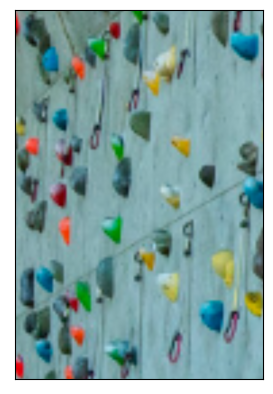

In [2]:
cols, rows, channels = img2.shape

roi = img1[ 5000 : rows + 5000, 1000 : cols + 1000]
plt.xticks([]), plt.yticks([])
plt.imshow(roi)

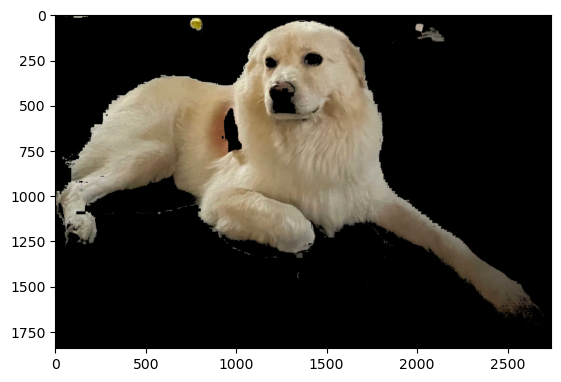

In [3]:
import numpy as np

# RGB를 HSV로 변환
hsv = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)

# HSV 색상 공간에서 노란색 영역을 설정
# 색상, 채도, 명도
lower1 = np.array([10, 20,70])
higher1 = np.array([30,255,255])
lower2 = np.array([10, 20,40])

# hsv 색상 공간에 범위값을 마스크로 생성
mask1 = cv2.inRange(hsv, lower1, higher1)
mask2 = cv2.inRange(hsv, lower2, higher1)

# 덕구 찾기
img3 = cv2.bitwise_and(img2, img2, mask=mask1)
img4 = cv2.bitwise_and(img2, img2, mask=mask2)

plt.imshow(img3)

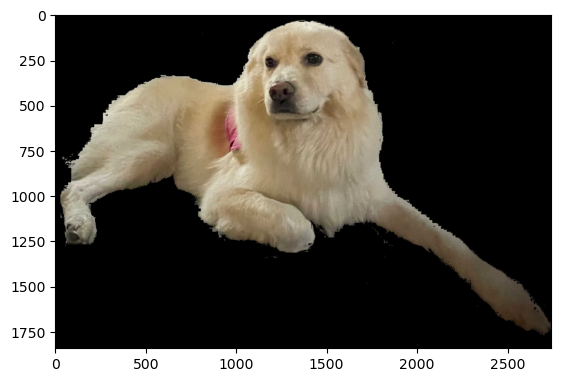

In [4]:
img3[500:800, 700:1100] = img2[500:800, 700:1100]
img3[200:600, 1150:1500] = img2[200:600, 1150:1500]
img3[1300:, 2300:] =img4[1300:, 2300:]
img3[:100, :900] = img3[100:200, :900]
img3[30:170, 1900:2200] = img3[:140, :300]
img3[1030:1150, 225:770] = img3[:120, :545]
img3[1250:1350, 900:1100] = img3[:100, :200]
img3[1316:1500, 1300:1400] = img3[:184, :100]
img3[1050:1270, 70:200] = img2[1050:1270, 70:200]
img3[900:1200, :30] = img3[:300, :30]
img3[1123:1180, 20:50] = img3[:57, :30]
img3[850:950, 100:300] = img2[850:950, 100:300]
plt.imshow(img3)

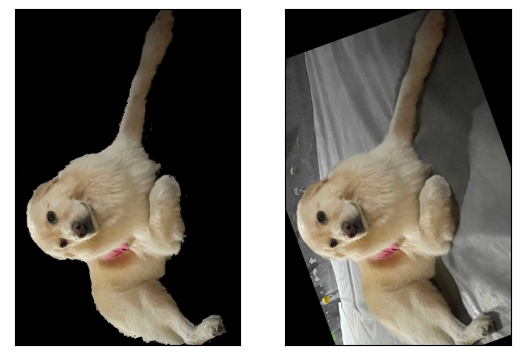

In [20]:
M = cv2.getRotationMatrix2D((1370, 1370), 110, 1.0)
rotated_img = cv2.warpAffine(img3, M, (1841, 2742))

plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(rotated_img)

M = cv2.getRotationMatrix2D((1370, 1370), 110, 1.0)
img5 = cv2.warpAffine(img2, M, (1841, 2742))

plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(img5)
plt.show()

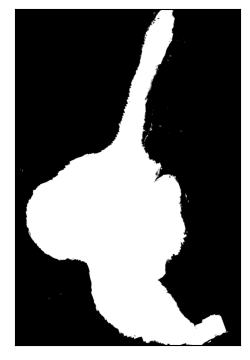

In [21]:
gray_img = cv2.cvtColor(rotated_img, cv2.COLOR_RGB2GRAY)
_, th_img = cv2.threshold(gray_img, 0, 150, cv2.THRESH_BINARY)

plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(th_img, cmap="gray")

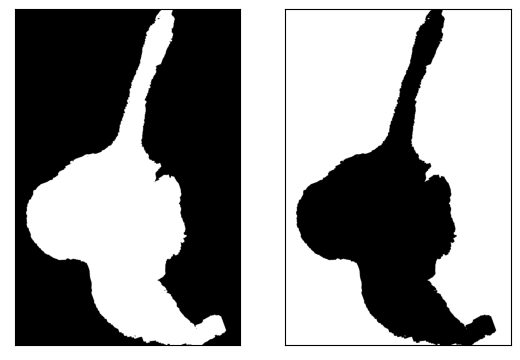

In [22]:
kernel = np.ones((10, 10), np.uint8)
result_open = cv2.morphologyEx(th_img, cv2.MORPH_OPEN, kernel)

plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(result_open, cmap="gray")

inv_img = cv2.bitwise_not(result_open)

plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(inv_img, cmap="gray")
plt.show()

In [23]:
img_bg = cv2.bitwise_and(roi, roi, mask=th_img)

plt.xticks([]), plt.yticks([])
plt.imshow(img_bg)
plt.show()

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\arithm.cpp:241: error: (-215:Assertion failed) (mtype == 0 || mtype == 1) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [10]:
img_fg = cv2.bitwise_and(img3, img3, mask=inv_img)

plt.xticks([]), plt.yticks([])
plt.imshow(img_fg)
plt.show()

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\arithm.cpp:241: error: (-215:Assertion failed) (mtype == 0 || mtype == 1) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [ ]:
kernel = np.array((10, 10), np.uint8)
result_open = cv2.morphologyEx(th_img, cv2.MORPH_CLOSE, kernel)

plt.xticks([]), plt.yticks([])
plt.imshow(result_open, cmap="gray")


## 크로마 키(Chroma key) 합성

- 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술

In [ ]:
#실습

In [ ]:
#실습

In [ ]:
#실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[6차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=2>
○ ROI (Region of Image) : 관심영역을 의미<br>
○ line() - 선그리기<br> 
○ circle() - 원 그리기<br> 
○ rectangle() - 사각형 그리기<br> 
○ ellipse() - 타원 그리기<br> 
○ putText() - 문자 출력<br>

○ bitwise_not() : 반전 연산<br>
○ bitwise_and() : AND 연산<br>
○ add() : 2개 이미지 합치기<br>

○ 크로마 키 합성 : 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술<br>

○ copyTo() : 녹색 영역에 다른 영역 배경을 합성하기            
        </font></td></tr>   
</table>